In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [2]:
file = pd.read_csv(r'C:\M2M\WIL-4 Regulatory(Licensing)\modelling\AGCO_Liquor_Sales_License_Synthetic_Data.csv')
file.head()

,Application_ID,Applicant_Name,Business_Name,Application_Date,Business_Address,Premises_Type,Applicant_Type,Seating_Capacity,Area_Type,Previous_Licenses_Held,...,Lineups_on_Public_Property,Ancillary_Areas,Proximity_to_Residential_Area,Proximity_to_School,Fire_Safety_Certificate,Municipal_Approval,Application_Status,Risk_Score,Risk_Classification,Licensing_Decision
0,LSL-00001,Rodney Daniel,"Rodriguez, Richards and Perry",53:53.0,"66705 Christine Prairie\n East Thomas, SK S9A 8P7",Hair Salon / Barber Shop,Sole Proprietor,77,Both,Yes,...,Yes,Yes,Yes,Yes,Valid,Approved,Submitted,10,Moderate,Conditional Approval
1,LSL-00002,Mrs. Karen Pratt,"York, Miller and Thomas",17:02.3,"868 William Brook Apt. 059\n Reyesborough, NB ...",Athletic Club,Sole Proprietor,298,Outdoor,No,...,Yes,No,Yes,No,Valid,Pending,Rejected,12,Moderate,Conditional Approval
2,LSL-00003,Michael Anderson,Scott-Christensen,01:18.3,"1833 Skinner Flats Apt. 521\n West John, NU V3...",Grocery Store,Partnership,299,Both,Yes,...,Yes,Yes,Yes,Yes,Expired,Pending,Approved,14,High,Rejected
3,LSL-00004,Taylor Huff,"Gonzalez, Chapman and Romero",30:09.8,"880 Johnson Keys\n East Calvin, AB P1T3X8",Retirement Residence,Sole Proprietor,85,Indoor,Yes,...,Yes,Yes,Yes,No,Valid,Pending,Rejected,11,Moderate,Conditional Approval
4,LSL-00005,Darren Bautista,Davis-Jackson,05:32.6,"716 Strickland Spurs\n Port Taraborough, BC G4...",Banquet Hall,Sole Proprietor,54,Indoor,No,...,No,Yes,No,Yes,Valid,Approved,Under Review,11,Moderate,Conditional Approval


In [3]:
file_shortened = file.iloc[:, :-1]
file_shortened.head()
file_shortened.columns

Index(['Application_ID', 'Applicant_Name', 'Business_Name', 'Application_Date',
       'Business_Address', 'Premises_Type', 'Applicant_Type',
       'Seating_Capacity', 'Area_Type', 'Previous_Licenses_Held',
       'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership',
       'Business_Longevity', 'Licensed_Areas', 'Automated_Liquor_Dispensers',
       'Lineups_on_Public_Property', 'Ancillary_Areas',
       'Proximity_to_Residential_Area', 'Proximity_to_School',
       'Fire_Safety_Certificate', 'Municipal_Approval', 'Application_Status',
       'Risk_Score', 'Risk_Classification'],
      dtype='object')

In [4]:
file_shortened.head()

,Application_ID,Applicant_Name,Business_Name,Application_Date,Business_Address,Premises_Type,Applicant_Type,Seating_Capacity,Area_Type,Previous_Licenses_Held,...,Automated_Liquor_Dispensers,Lineups_on_Public_Property,Ancillary_Areas,Proximity_to_Residential_Area,Proximity_to_School,Fire_Safety_Certificate,Municipal_Approval,Application_Status,Risk_Score,Risk_Classification
0,LSL-00001,Rodney Daniel,"Rodriguez, Richards and Perry",53:53.0,"66705 Christine Prairie\n East Thomas, SK S9A 8P7",Hair Salon / Barber Shop,Sole Proprietor,77,Both,Yes,...,No,Yes,Yes,Yes,Yes,Valid,Approved,Submitted,10,Moderate
1,LSL-00002,Mrs. Karen Pratt,"York, Miller and Thomas",17:02.3,"868 William Brook Apt. 059\n Reyesborough, NB ...",Athletic Club,Sole Proprietor,298,Outdoor,No,...,No,Yes,No,Yes,No,Valid,Pending,Rejected,12,Moderate
2,LSL-00003,Michael Anderson,Scott-Christensen,01:18.3,"1833 Skinner Flats Apt. 521\n West John, NU V3...",Grocery Store,Partnership,299,Both,Yes,...,No,Yes,Yes,Yes,Yes,Expired,Pending,Approved,14,High
3,LSL-00004,Taylor Huff,"Gonzalez, Chapman and Romero",30:09.8,"880 Johnson Keys\n East Calvin, AB P1T3X8",Retirement Residence,Sole Proprietor,85,Indoor,Yes,...,Yes,Yes,Yes,Yes,No,Valid,Pending,Rejected,11,Moderate
4,LSL-00005,Darren Bautista,Davis-Jackson,05:32.6,"716 Strickland Spurs\n Port Taraborough, BC G4...",Banquet Hall,Sole Proprietor,54,Indoor,No,...,Yes,No,Yes,No,Yes,Valid,Approved,Under Review,11,Moderate


In [5]:
X = file_shortened[['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
               'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 'Business_Longevity',
               'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 'Ancillary_Areas',
               'Proximity_to_Residential_Area', 'Proximity_to_School', 'Fire_Safety_Certificate',
               'Municipal_Approval', 'Application_Status']]
print(X)
y = file_shortened['Risk_Classification']
print(X['Compliance_History'].unique())

               Premises_Type      Applicant_Type Area_Type  \
0   Hair Salon / Barber Shop     Sole Proprietor      Both   
1              Athletic Club     Sole Proprietor   Outdoor   
2              Grocery Store         Partnership      Both   
3       Retirement Residence     Sole Proprietor    Indoor   
4               Banquet Hall     Sole Proprietor    Indoor   
..                       ...                 ...       ...   
95             Internet Cafe       First Nations   Outdoor   
96    Motion Picture Theatre       First Nations    Indoor   
97             General Store  Federal Government      Both   
98               Golf Course  Federal Government      Both   
99                Night Club         Partnership    Indoor   

   Previous_Licenses_Held Compliance_History Tax_Compliance_Status  \
0                     Yes           Multiple             Compliant   
1                      No              Minor             Compliant   
2                     Yes              Minor 

In [6]:
# Assign weights to the Premise
premises_type_weights = {
    'Adult Entertainment': 3,
    'Arcade-style Facility': 1, 'Art Gallery': 1,
    'Athletic Club': 2,
    'Auditorium': 1,
    'Automotive / Marina': 1,
    'Banquet Hall': 1,
    'Bar / Sports Bar': 3,
    'Big Box Retail Store': 1,
    'Billiard / Pool Hall': 2,
    'Bingo Hall': 1,
    'Bookstore': 1,
    'Bowling Alley': 2,
    'Community Centre': 1,
    'Convenient Store': 2,
    'Educational Facility-Over 19 yrs of age': 1,
    'Funeral Home': 1,
    'General Store': 2,
    'Golf Course': 1,
    'Grocery Store': 2,
    'Hair Salon / Barber Shop': 1,
    'Historical Site / Landmark': 1,
    'Hotel / Motel': 2,
    'Internet Cafe': 1,
    'Karaoke Bar / Restaurant': 3,
    'Laundromat': 1,
    'Live Theatre': 2,
    'Medical Facility': 1,
    'Military': 1,
    'Motion Picture Theatre': 2,
    'Museum': 1,
    'Night Club': 3,
    'Other': 3,
    'Railway Car': 1,
    'Restaurant (Franchise)': 2,
    'Restaurant / Bar': 3,
    'Retirement Residence': 1,
    'Social Club': 3,
    'Spa': 1,
    'Speciality Food Store': 1,
    'Specialty Merchandise Store': 1,
    'Stadium': 2,
    'Train': 1
}


In [7]:
# Define mappings for categorical columns
compliance_history_weights = {
    "Minor": 2,
    "Multiple": 3,
    "Severe": 4
}

tax_compliance_held_weights = {
    'Compliant': 1,
    'Non-Compliant': 2
}

proximity_weights = {"Yes": 1, "No": 0}
fire_safety_weights = {'Valid': 1, 'Expired': 2}
municipal_approval_weights = {'Approved': 1, 'Pending': 2}

# Use .loc to avoid SettingWithCopyWarning and ensure safe modification
X.loc[:, 'Compliance_History'] = X['Compliance_History'].map(compliance_history_weights).fillna(1)
X.loc[:, 'Tax_Compliance_Status'] = X['Tax_Compliance_Status'].map(tax_compliance_held_weights)
X.loc[:, 'Premises_Type'] = X['Premises_Type'].map(premises_type_weights)

X.loc[:, 'Previous_Licenses_Held'] = X['Previous_Licenses_Held'].map(proximity_weights)
X.loc[:, 'Proximity_to_Residential_Area'] = X['Proximity_to_Residential_Area'].map(proximity_weights)
X.loc[:, 'Proximity_to_School'] = X['Proximity_to_School'].map(proximity_weights)
X.loc[:, 'Fire_Safety_Certificate'] = X['Fire_Safety_Certificate'].map(fire_safety_weights)
X.loc[:, 'Municipal_Approval'] = X['Municipal_Approval'].map(municipal_approval_weights)

In [8]:
# Weights to the IMPORTANT features
weights = {
    'Compliance_History': 10,  # Make 'Compliance_History' 3 times more influential
    'Previous_Licenses_Held': 8,  # Make 'Previous_Licenses_Held' 2 times more influential
    'Premises_Type': 8,
    'Proximity_to_Residential_Area': 8,
    'Proximity_to_School': 8,
    'Fire_Safety_Certificate': 8,
    'Municipal_Approval': 8
}

In [9]:
print(X.head())

  Premises_Type   Applicant_Type Area_Type Previous_Licenses_Held  \
0           1.0  Sole Proprietor      Both                      1   
1           2.0  Sole Proprietor   Outdoor                      0   
2           2.0      Partnership      Both                      1   
3           1.0  Sole Proprietor    Indoor                      1   
4           1.0  Sole Proprietor    Indoor                      0   

  Compliance_History Tax_Compliance_Status Premises_Ownership  \
0                3.0                     1                 No   
1                2.0                     1                 No   
2                2.0                     2                 No   
3                4.0                     2                Yes   
4                4.0                     1                Yes   

  Business_Longevity   Licensed_Areas Automated_Liquor_Dispensers  \
0  More than 5 years              NaN                          No   
1   Less than 1 year  Outdoor Seating                   

In [10]:
for feature, weight in weights.items():
    X.loc[:, feature] = X[feature] * weight
print(X)

   Premises_Type      Applicant_Type Area_Type Previous_Licenses_Held  \
0            8.0     Sole Proprietor      Both                      8   
1           16.0     Sole Proprietor   Outdoor                      0   
2           16.0         Partnership      Both                      8   
3            8.0     Sole Proprietor    Indoor                      8   
4            8.0     Sole Proprietor    Indoor                      0   
..           ...                 ...       ...                    ...   
95           8.0       First Nations   Outdoor                      0   
96          16.0       First Nations    Indoor                      8   
97          16.0  Federal Government      Both                      0   
98           8.0  Federal Government      Both                      8   
99          24.0         Partnership    Indoor                      0   

   Compliance_History Tax_Compliance_Status Premises_Ownership  \
0                30.0                     1              

In [11]:
# Columns to encode
columns_to_encode = [
    'Applicant_Type', 'Area_Type', 'Premises_Ownership', 'Business_Longevity',
    'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property',
    'Ancillary_Areas', 'Application_Status'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Use .loc to avoid SettingWithCopyWarning and encode safely
for col in columns_to_encode:
    X.loc[:, col] = label_encoder.fit_transform(X[col])


In [12]:
print(X.head())

  Premises_Type Applicant_Type Area_Type Previous_Licenses_Held  \
0           8.0              9         0                      8   
1          16.0              9         2                      0   
2          16.0              7         0                      8   
3           8.0              9         1                      8   
4           8.0              9         1                      0   

  Compliance_History Tax_Compliance_Status Premises_Ownership  \
0               30.0                     1                  0   
1               20.0                     1                  0   
2               20.0                     2                  0   
3               40.0                     2                  1   
4               40.0                     1                  1   

  Business_Longevity Licensed_Areas Automated_Liquor_Dispensers  \
0                  2              2                           0   
1                  1              0                           0   
2    

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model 

In [14]:
# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Feature Importances
importances = model.feature_importances_
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': importances}
).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Feature Importances:
                          Feature  Importance
13            Proximity_to_School    0.165517
1                  Applicant_Type    0.157679
10     Lineups_on_Public_Property    0.131100
8                  Licensed_Areas    0.124138
11                Ancillary_Areas    0.119540
7              Business_Longevity    0.082759
9     Automated_Liquor_Dispensers    0.073563
14        Fire_Safety_Certificate    0.064556
4              Compliance_History    0.051034
12  Proximity_to_Residential_Area    0.030113
15             Municipal_Approval    0.000000
0                   Premises_Type    0.000000
6              Premises_Ownership    0.000000
5           Tax_Compliance_Status    0.000000
3          Previous_Licenses_Held    0.000000
2                       Area_Type    0.000000
16             Application_Status    0.000000

Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
  

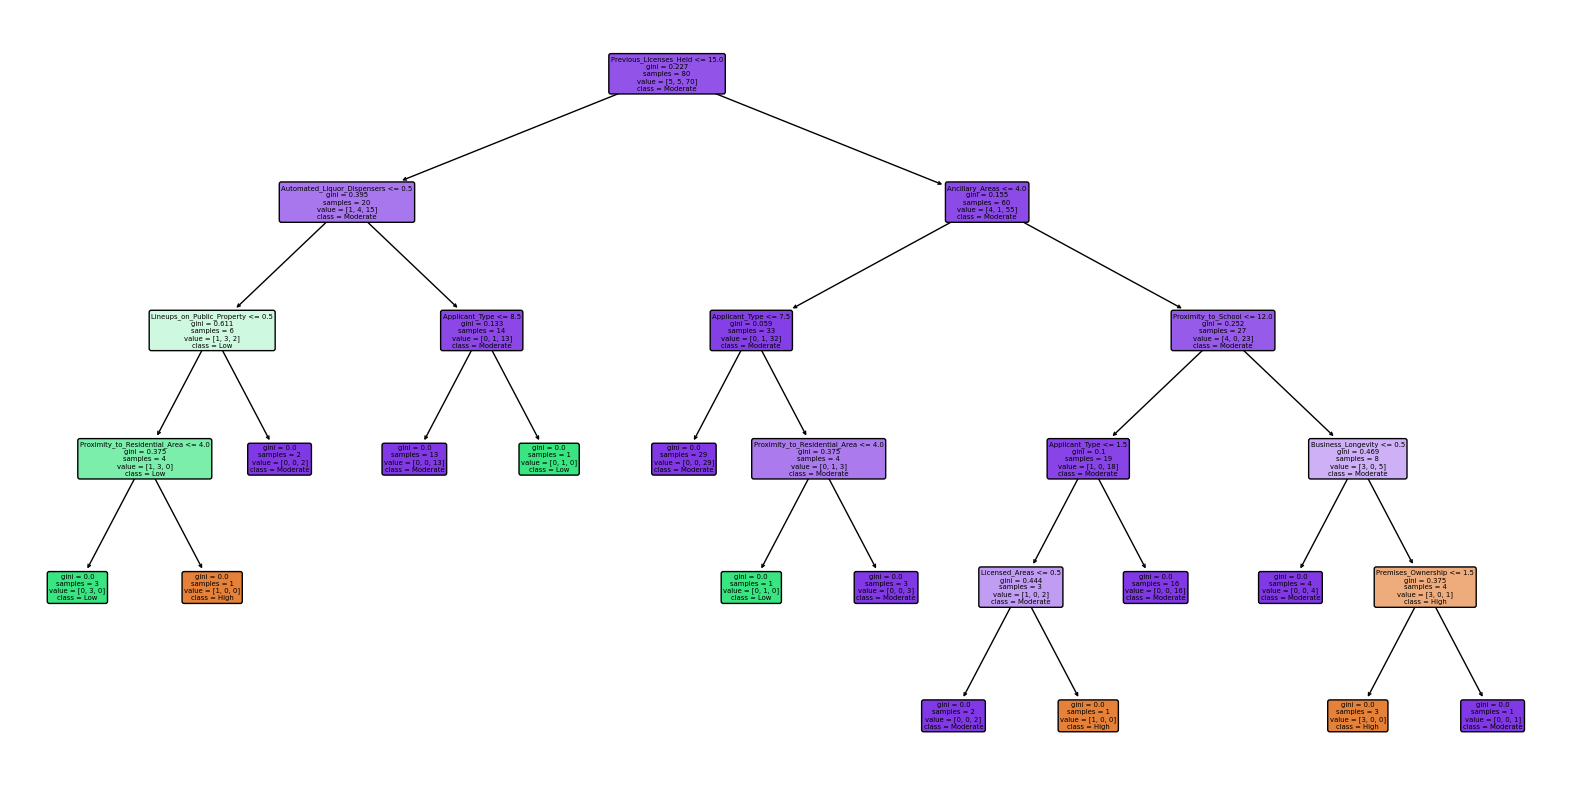

In [15]:
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
plot_tree(model,
          feature_names=['License_Type', 'Applicant_Type', 'Premises_Type', 'Area_Type', 'Previous_Licenses_Held',
               'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 'Business_Longevity',
               'Licensed_Areas', 'Automated_Liquor_Dispensers', 'Lineups_on_Public_Property', 'Ancillary_Areas',
               'Proximity_to_Residential_Area', 'Proximity_to_School', 'Fire_Safety_Certificate',
               'Municipal_Approval', 'Application_Status', 'Last_Inspection_Outcome', 'High_Risk_Location'],
          class_names=model.classes_.astype(str),  # Use class names (targets)
          filled=True,  # Color nodes to indicate purity
          rounded=True)  # Make the nodes rounded for a cleaner look

plt.show()

# Random Forest model

In [16]:
# Encode the target labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report with zero_division to avoid warnings
report = classification_report(y_test, y_pred, zero_division=1, target_names=encoder.classes_)

# Display accuracy and classification report
print(f"Random Forest Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Calculate feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)


Random Forest Model Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         3
         Low       1.00      0.00      0.00         3
    Moderate       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.90      0.33      0.27        20
weighted avg       0.79      0.70      0.58        20

Feature Importances:
                          Feature  Importance
1                  Applicant_Type    0.141694
4              Compliance_History    0.117075
2                       Area_Type    0.074348
7              Business_Longevity    0.069343
8                  Licensed_Areas    0.066618
0                   Premises_Type    0.064607
10     Lineups_on_Public_Property    0.064054
12  Proximity_to_Residential_Area    0.049885
3          Previous_Licenses_Held    0.047385
16             Application_Status    0.047239
14        Fire_Safety_Certificate 

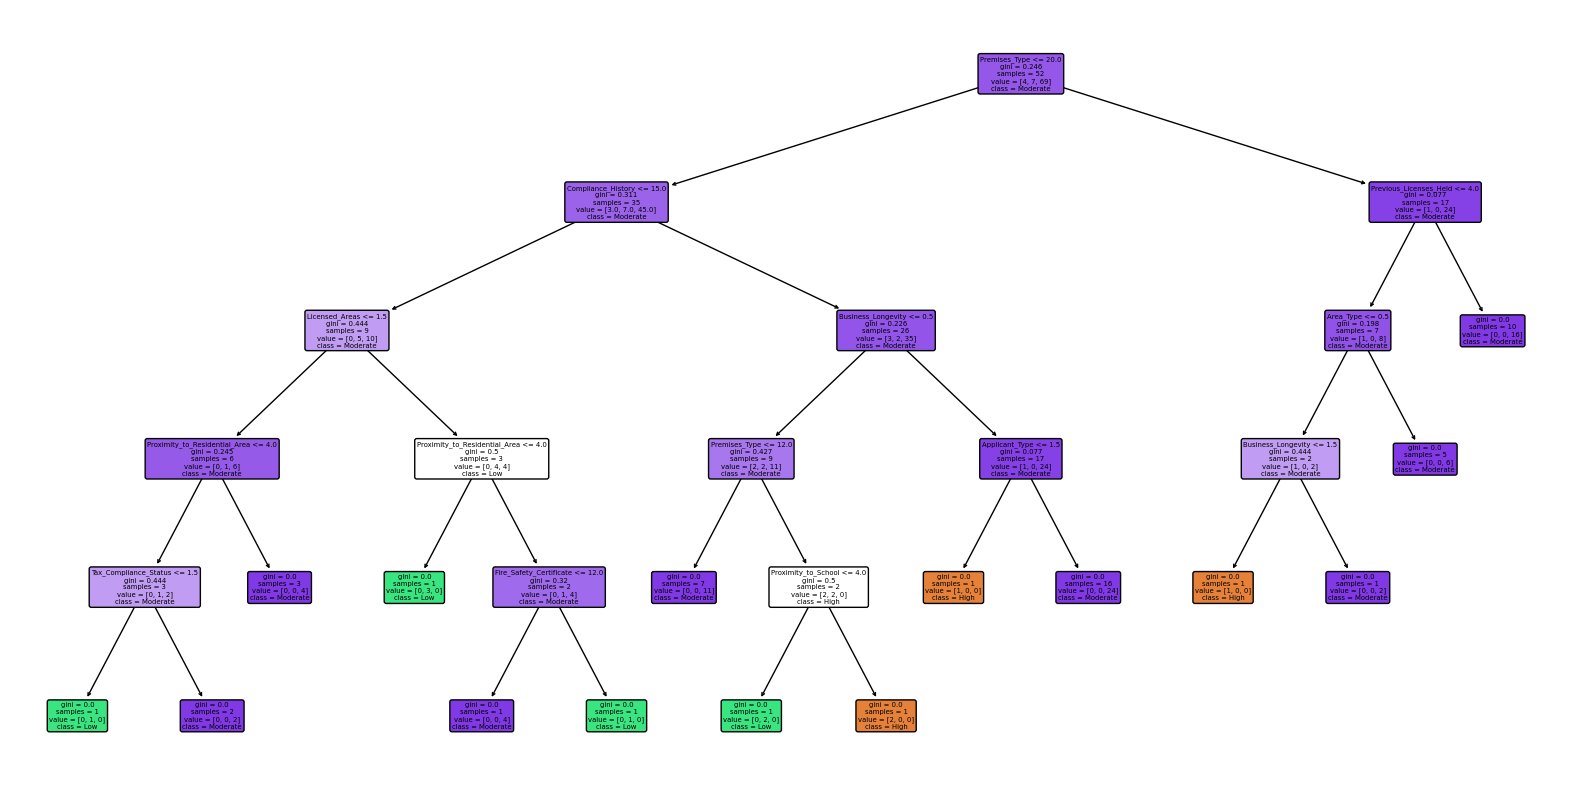

In [17]:
# Extract the first tree from the trained Random Forest
tree_in_forest = rf_model.estimators_[0]

# Set up the figure for better visualization
plt.figure(figsize=(20, 10))  # Adjust size for readability

# Plot the extracted decision tree
plot_tree(tree_in_forest,
          feature_names=['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
                         'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 
                         'Business_Longevity', 'Licensed_Areas', 'Automated_Liquor_Dispensers', 
                         'Lineups_on_Public_Property', 'Ancillary_Areas', 'Proximity_to_Residential_Area', 
                         'Proximity_to_School', 'Fire_Safety_Certificate', 'Municipal_Approval', 
                         'Application_Status'],
          class_names=encoder.classes_.astype(str),  # Use the target class names
          filled=True,  # Color nodes based on purity
          rounded=True)  # Rounded nodes for aesthetics

# Display the plot
plt.show()


#  Gradient Boosting model

In [18]:

# Use most frequent imputation for missing values
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values in both train and test datasets
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = gb_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate feature importances
importances = gb_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

Gradient Boosting Model Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.00      0.00      0.00         3
    Moderate       0.68      0.93      0.79        14

    accuracy                           0.65        20
   macro avg       0.23      0.31      0.26        20
weighted avg       0.48      0.65      0.55        20

Feature Importances:
                          Feature  Importance
1                  Applicant_Type    0.164108
4              Compliance_History    0.150983
8                  Licensed_Areas    0.109133
12  Proximity_to_Residential_Area    0.104660
11                Ancillary_Areas    0.091192
7              Business_Longevity    0.081197
10     Lineups_on_Public_Property    0.067147
3          Previous_Licenses_Held    0.062586
14        Fire_Safety_Certificate    0.051211
2                       Area_Type    0.033855
13            Proximity_to_Sch

C:\Users\shaha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shaha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shaha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

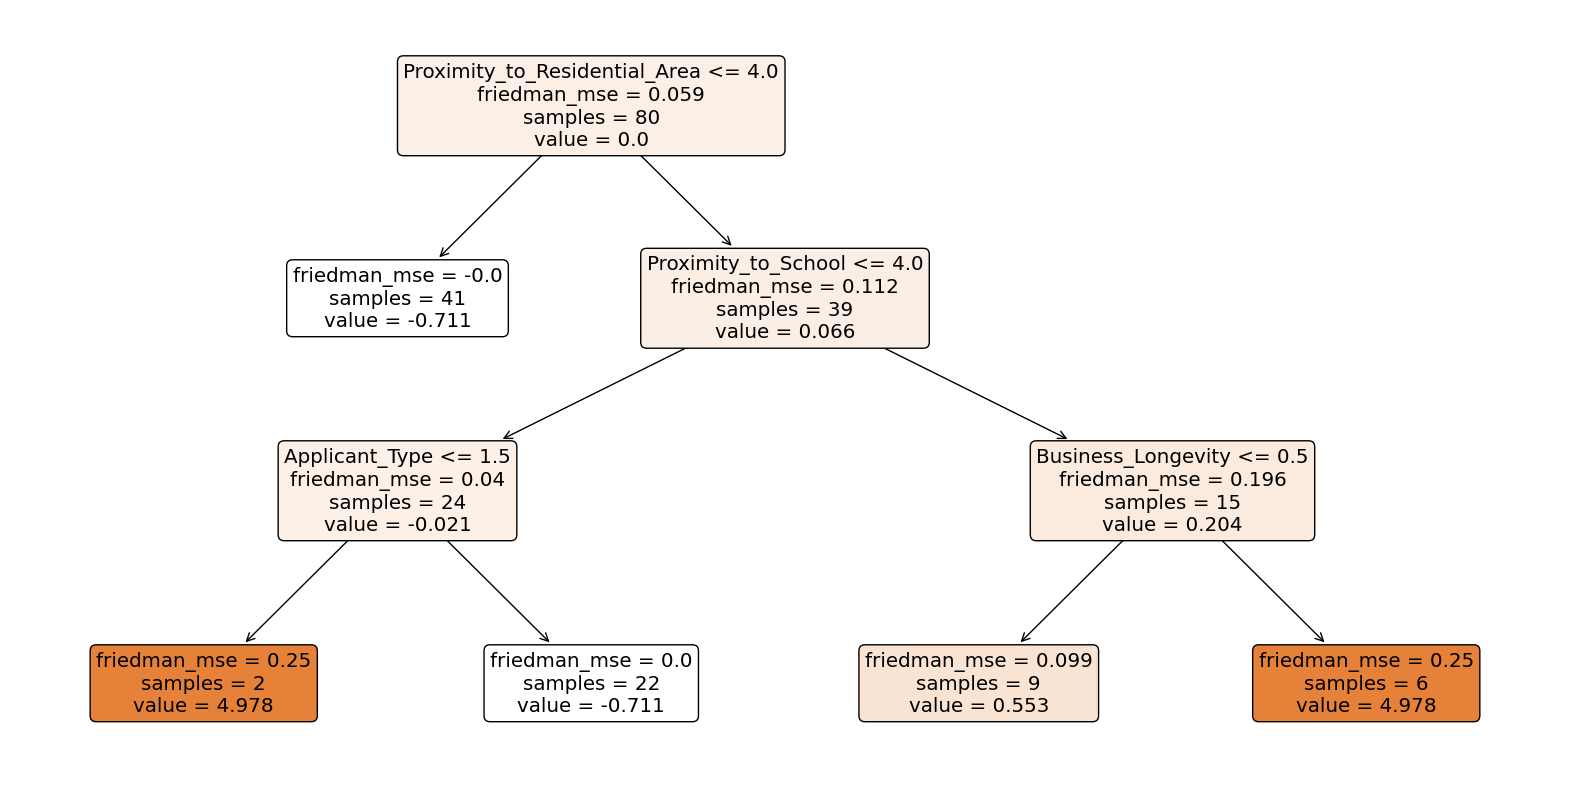

In [19]:

# Extract the first tree from the trained Gradient Boosting model
tree_in_gb = gb_model.estimators_[0, 0]  # First estimator from the first boosting stage

# Set up the figure for better visualization
plt.figure(figsize=(20, 10))  # Adjust size for readability

# Plot the extracted decision tree
plot_tree(tree_in_gb,
          feature_names=['Premises_Type', 'Applicant_Type', 'Area_Type', 'Previous_Licenses_Held',
                         'Compliance_History', 'Tax_Compliance_Status', 'Premises_Ownership', 
                         'Business_Longevity', 'Licensed_Areas', 'Automated_Liquor_Dispensers', 
                         'Lineups_on_Public_Property', 'Ancillary_Areas', 'Proximity_to_Residential_Area', 
                         'Proximity_to_School', 'Fire_Safety_Certificate', 'Municipal_Approval', 
                         'Application_Status'],
          filled=True,  # Color nodes based on purity
          rounded=True)  # Rounded nodes for aesthetics

# Display the plot
plt.show()


# Model comparison

In [20]:

# Dictionary to store results
results = {}

# 1. Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_imputed, y_train)
y_pred_dt = dt_model.predict(X_test_imputed)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
results['Decision Tree'] = {'Accuracy': dt_accuracy, 'Report': dt_report}

# 2. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
results['Random Forest'] = {'Accuracy': rf_accuracy, 'Report': rf_report}

# 3. Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_imputed, y_train)
y_pred_gb = gb_model.predict(X_test_imputed)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb, output_dict=True, zero_division=0)
results['Gradient Boosting'] = {'Accuracy': gb_accuracy, 'Report': gb_report}

# Prepare model comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [dt_accuracy, rf_accuracy, gb_accuracy]
})

# Display the model comparison results
print("\nModel Comparison:")
display(comparison_df)

# Display classification reports for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Classification Report:")
    report_df = pd.DataFrame(metrics['Report']).transpose()
    display(report_df)



Model Comparison:


,Model,Accuracy
0,Decision Tree,0.65
1,Random Forest,0.70
2,Gradient Boosting,0.65



Decision Tree Classification Report:


,precision,recall,f1-score,support
High,0.000000,0.000000,0.000000,3.00
Low,0.000000,0.000000,0.000000,3.00
Moderate,0.684211,0.928571,0.787879,14.00
accuracy,0.650000,0.650000,0.650000,0.65
macro avg,0.228070,0.309524,0.262626,20.00
weighted avg,0.478947,0.650000,0.551515,20.00



Random Forest Classification Report:


,precision,recall,f1-score,support
High,0.000000,0.000000,0.000000,3.0
Low,0.000000,0.000000,0.000000,3.0
Moderate,0.700000,1.000000,0.823529,14.0
accuracy,0.700000,0.700000,0.700000,0.7
macro avg,0.233333,0.333333,0.274510,20.0
weighted avg,0.490000,0.700000,0.576471,20.0



Gradient Boosting Classification Report:


,precision,recall,f1-score,support
High,0.000000,0.000000,0.000000,3.00
Low,0.000000,0.000000,0.000000,3.00
Moderate,0.684211,0.928571,0.787879,14.00
accuracy,0.650000,0.650000,0.650000,0.65
macro avg,0.228070,0.309524,0.262626,20.00
weighted avg,0.478947,0.650000,0.551515,20.00


# Feature Visualation 

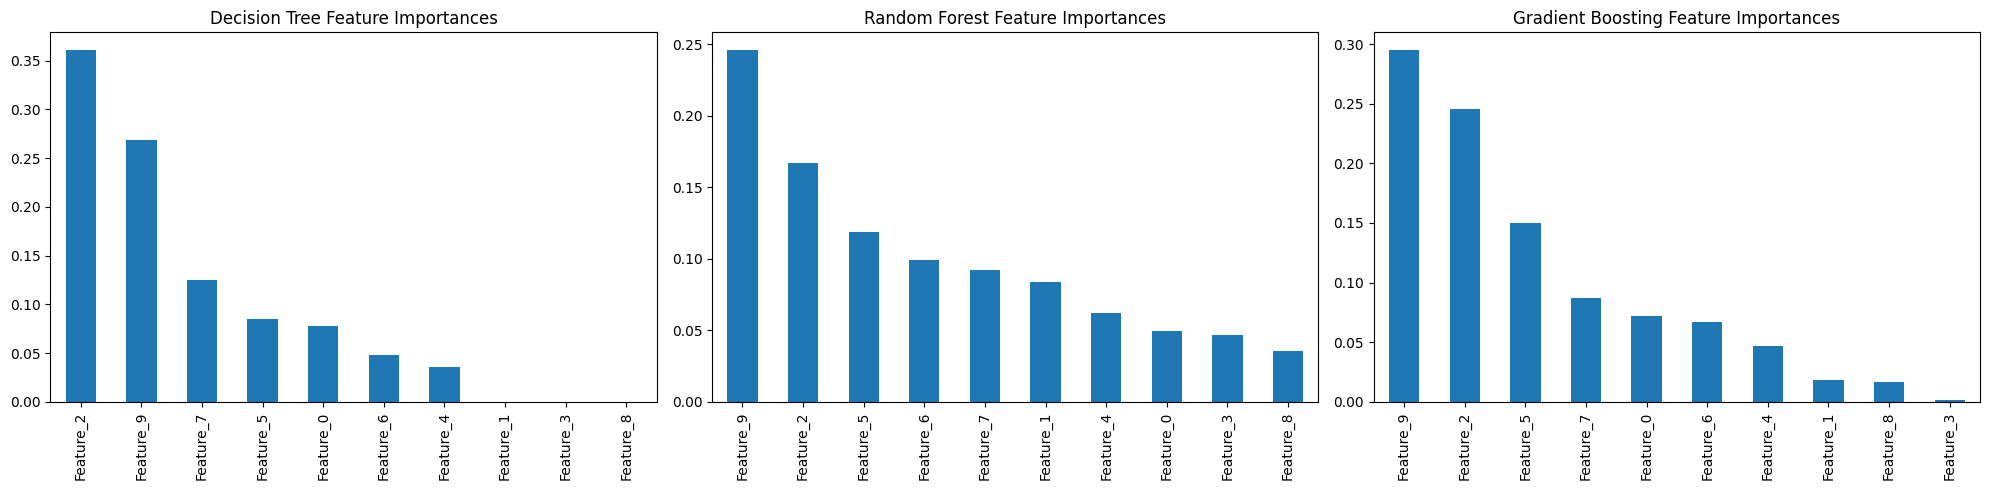

In [21]:


# Sample data to simulate X_train and y_train
X_train, y_train = make_classification(
    n_samples=100, n_features=10, random_state=42, n_informative=5
)
X_train = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(10)])

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Collect feature importances from each model
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gb_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances for all three models
plt.figure(figsize=(20, 5))

# Plot for Decision Tree
plt.subplot(1, 3, 1)
dt_importances.plot(kind='bar', title='Decision Tree Feature Importances')
plt.xticks(rotation=90)

# Plot for Random Forest
plt.subplot(1, 3, 2)
rf_importances.plot(kind='bar', title='Random Forest Feature Importances')
plt.xticks(rotation=90)

# Plot for Gradient Boosting
plt.subplot(1, 3, 3)
gb_importances.plot(kind='bar', title='Gradient Boosting Feature Importances')
plt.xticks(rotation=90)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Model Accuracy Copmarison: 

#Copmarison using Bar Graph

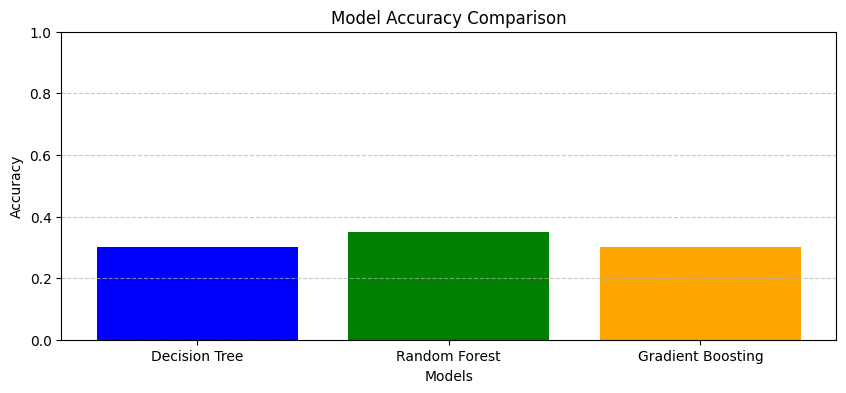

In [22]:
# Generating a synthetic dataset to simulate your scenario
np.random.seed(42)

# Create a dataframe with 100 samples and relevant columns
data = pd.DataFrame({
    'Feature1': np.random.randint(0, 10, 100),
    'Feature2': np.random.randint(0, 5, 100),
    'Feature3': np.random.choice(['A', 'B', 'C'], 100),
    'Feature4': np.random.choice([0, 1], 100),
    'Risk_Classification': np.random.choice(['High', 'Moderate', 'Low'], 100)
})

# Convert categorical features to numeric using label encoding
data['Feature3'] = data['Feature3'].astype('category').cat.codes
data['Risk_Classification'] = data['Risk_Classification'].astype('category').cat.codes

# Split the dataset into features (X) and target (y)
X = data.drop('Risk_Classification', axis=1)
y = data['Risk_Classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train and evaluate Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train and evaluate Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

# Prepare comparison data
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [dt_accuracy, rf_accuracy, gb_accuracy]

# Plot the accuracy comparison
plt.figure(figsize=(10, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


#Copmarison using Confusion Matrix

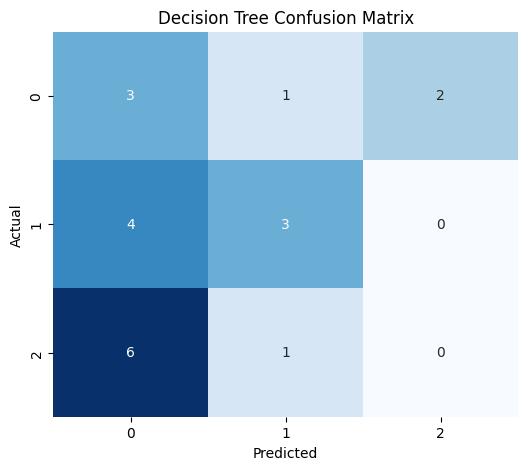

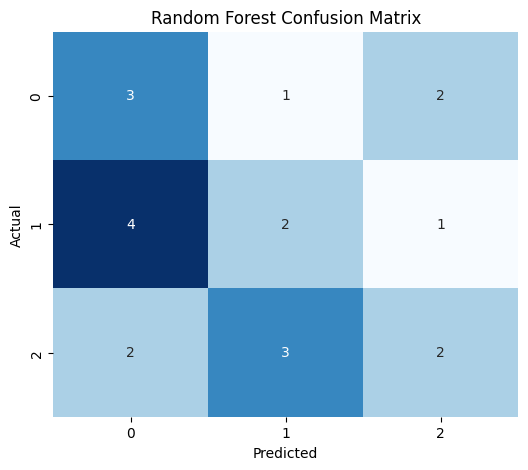

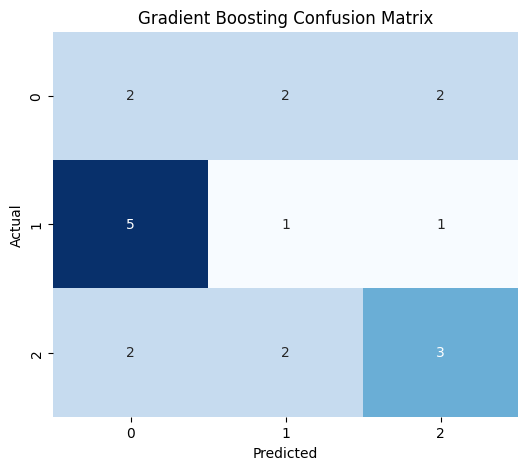

In [23]:
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train and predict with Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train and predict with Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train and predict with Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")
